In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.figure_factory as ff
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.pipeline import Pipeline


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix


from sklearn.metrics import (accuracy_score, log_loss, classification_report)


import warnings

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
cols_to_drop = (['EmployeeCount', 'StandardHours', 'EmployeeNumber', 'DailyRate', 'HourlyRate', 'MonthlyRate'])

In [4]:
df = df.drop(columns=cols_to_drop)

In [5]:
df['AnnualIncome'] = df['MonthlyIncome'] * 12

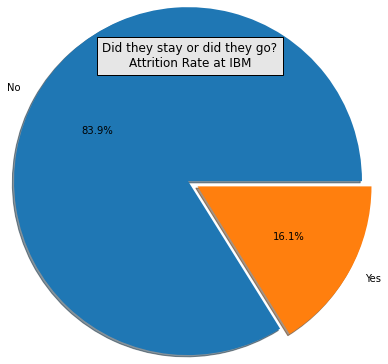

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


data = [df.groupby('Attrition')['Attrition'].count()[0], df.groupby('Attrition')['Attrition'].count()[1]]
labels=['No', 'Yes']

#create pie chart
plt.pie(data, labels = labels, autopct='%.1f%%', shadow=True, explode=[0.025, 0.1],radius = 2)


plt.title("Did they stay or did they go?\n" + "Attrition Rate at IBM", bbox={'facecolor':'0.9', 'pad':5})


plt.show()

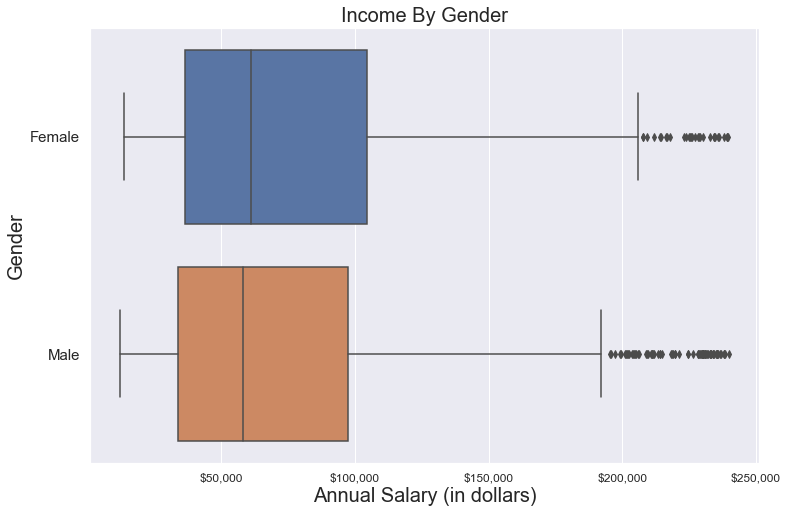

In [9]:
plt.figure(figsize = (12,8))

sns.set_theme()

ax = sns.boxplot(x='AnnualIncome', y='Gender', data=df)


ax.set_title('Income By Gender', fontsize=20);
plt.xlabel('Annual Salary (in dollars)', fontsize=20)
plt.ylabel('Gender', fontsize=20)

plt.xticks(fontsize= 12)
plt.yticks(fontsize= 15)


ax.xaxis.set_major_formatter('${x:,.0f}');

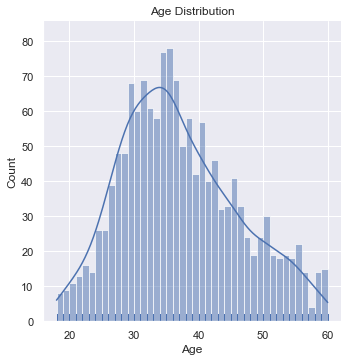

In [10]:
ax = sns.displot(data = df, x="Age", binwidth=1, rug=True, kde=True);


ax.set(title='Age Distribution');


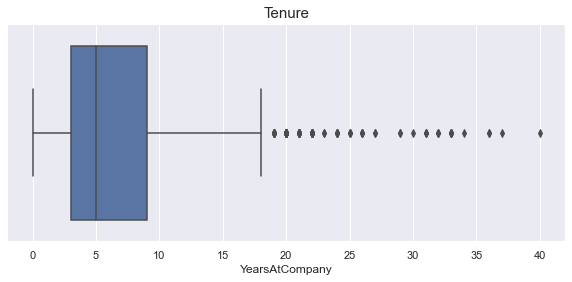

In [11]:
plt.figure(figsize = (10,4))


ax = sns.boxplot(x='YearsAtCompany', data=df)

ax.set_title('Tenure', fontsize=15);

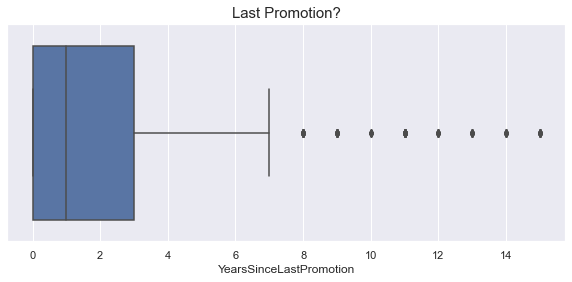

In [12]:
plt.figure(figsize = (10,4))


ax = sns.boxplot(x='YearsSinceLastPromotion', data=df)

ax.set_title('Last Promotion?', fontsize=15);


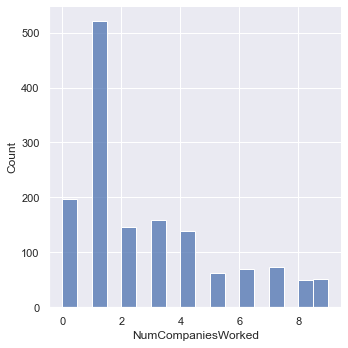

In [13]:
ax = sns.displot(x='NumCompaniesWorked', data=df)

NameError: name 'YearsAtCompany' is not defined

In [ ]:
df[['PercentSalaryHike','PerformanceRating']].corr()


df[df['PerformanceRating'] == 4]['PercentSalaryHike'].min()

In [ ]:
sns.scatterplot(x='PerformanceRating', y='PercentSalaryHike', data=df)

In [ ]:
plt.figure(figsize = (7,10))

# dictionary = {3: 'three', 4: 'four'}


sns.countplot(x='PercentSalaryHike',palette = "Set2", hue='Attrition', data=df);



In [ ]:
attrition = df[(df['Attrition'] != 0)]
no_attrition = df[(df['Attrition'] == 0)]


def plot_distribution(var_select, bin_size) : 
# Calculate the correlation coefficient between the new variable and the target
    corr = df['Attrition'].corr(df[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_attrition', 'No_attrition']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    
    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    py.iplot(fig, filename = 'Density plot')

In [ ]:
def barplot(var_select, x_no_numeric) :
    tmp1 = df[(df['Attrition'] != 0)]
    tmp2 = df[(df['Attrition'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(df[var_select],df['Attrition']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Attrition',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Attrition'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [ ]:
plot_distribution('JobLevel', False)
barplot('JobLevel', False)

In [ ]:
# plot_distribution('JobRole', False)
# barplot('JobRole', False)

In [ ]:
plt.figure(figsize = (10,8))

sns.countplot(x='Age', hue='Attrition', data=df);

In [ ]:
tmp1 = df[(df['Attrition'] != 0)]
tmp2 = df[(df['Attrition'] == 0)]



In [ ]:
# Create Loyalty Index

df['AvgTenure'] = df['TotalWorkingYears'] / df['NumCompaniesWorked']
df.info()

In [ ]:
# le = LabelEncoder()

# for i, column in enumerate(df):
#     if type(df.iloc[1,i]) == str:
#         df[column] = le.fit_transform(df[column])
#     else:
#         continue
        
# df.head()

In [ ]:
enc = OneHotEncoder()

In [ ]:
df.info()

In [ ]:
X = df.drop(columns = ['Attrition', 'AvgTenure'], axis=1)

y = df['Attrition']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
type(X_train.select_dtypes(['object']).columns


# y_pred = pipe.predict(X_test)

In [ ]:
print("Model:")
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("__"*40)
print(" ")
print(classification_report(y_test, y_pred))

In [ ]:
plot_confusion_matrix(pipe, X_test, y_test);

In [ ]:
print("Model:")
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("__"*40)
print(" ")
print(classification_report(y_test, y_pred))

In [ ]:
# 

In [ ]:
# 

# RESTART


